In [1]:
# Clean up Alex_Heater

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file = '''./csv_20220525'''
df = pd.read_csv(file)
df.columns = ['space', 'timestamp', 'value']
df.value = df.value.astype(float)
df.head()

,space,timestamp,value
0,RPT1106_Bath_2nd_window,1647996221095,0.0
1,RPT1106_Bath_2nd_window,1647996281095,0.0
2,RPT1106_Bath_2nd_window,1647996341095,0.0
3,RPT1106_Bath_2nd_window,1647996401095,0.0
4,RPT1106_Bath_2nd_window,1647996461095,0.0


In [4]:
df1 = df[df['space'] == "RPT1106_heater_temp"]
df2 = df[df["space"] == "RPT1106_heater_switch"]

df1.index = df1.timestamp
df2.index = df2.timestamp

In [5]:
heater_temp = df1
heater_switch = df2

In [6]:
heater_temp.shape, heater_switch.shape

((114119, 3), (114120, 3))

In [7]:
print(df1.shape)
print(df2.shape)

(114119, 3)
(114120, 3)


In [8]:
df2.rename(columns = {'value':'power'}, inplace = True)

for index, row in df2.iterrows():
    if(len(df1[df1.index==index]) > 0):
        df2.loc[index,'temperature'] = df1.loc[index,'value']
        df2.loc[index,'time'] = datetime.fromtimestamp(row['timestamp'] // 1000).strftime("%H%M00")  
    
data = df2

In [9]:
counter = 0
start = True
status = 1
i = 0
for index, row in data.iterrows():    
    if(start == True):
        start = False
        data.loc[index, 'counter'] = counter
        counter += 1        
        status = 0 if data.loc[index, 'power'] < 250 else 1
        continue
    newstatus = 0 if data.loc[index, 'power'] < 250 else 1
    if(status == newstatus):
        data.loc[index, 'counter'] = counter
        counter += 1
    else:
        counter = 0
        data.loc[index, 'counter'] = counter
        status = newstatus

In [10]:
data = data[['temperature', 'power', 'counter', 'time']]
data.head(5)

,temperature,power,counter,time
timestamp,,,,
1647996161095,60.6,0.0,0.0,014200
1647996221095,60.6,0.0,1.0,014300
1647996281095,60.6,0.0,2.0,014400
1647996341095,60.6,0.0,3.0,014500
1647996401095,60.6,0.0,4.0,014600


In [11]:
data.describe()

,temperature,power,counter
count,114119.000000,114120.000000,114120.000000
mean,65.073090,417.124212,85.427603
std,5.173163,793.614208,76.008441
min,27.800000,0.000000,0.000000
25%,63.000000,0.000000,24.000000
50%,65.800000,0.000000,65.000000
75%,68.300000,0.000000,128.000000
max,71.800000,2068.400000,493.000000


In [12]:
# check for duplication in data
x = set()
for index, row in data.iterrows():    
    x.add(index)

len(x) ==  data.shape[0]
# True means that there is no duplication

True

In [13]:
file = '''RPT1106_data_all.csv'''
data.to_csv(file)
# data = pd.read_csv(file)
data.head()

,temperature,power,counter,time
timestamp,,,,
1647996161095,60.6,0.0,0.0,014200
1647996221095,60.6,0.0,1.0,014300
1647996281095,60.6,0.0,2.0,014400
1647996341095,60.6,0.0,3.0,014500
1647996401095,60.6,0.0,4.0,014600


In [14]:
# remove days that has less than 1440 entries. 
temp_data = data[814:]
lstcount = []
timer = 0
currtime = -1
for index, row in temp_data.iterrows():
    if(float(row.time) > currtime):
        currtime = float(row.time)    
        timer+=1
    else:
        currtime = float(row.time)
#         print(currtime)
        lstcount.append(timer)
        timer=1

newdata = temp_data[:0]
lowerbound = 0
for item in lstcount:    
    if(abs(1440 - item) < 40):
        newdata = newdata.append(temp_data[lowerbound:lowerbound+item])        
    lowerbound += item

In [15]:
lstcount2 = []
timer = 0
currtime = -1
for index, row in newdata.iterrows():
    if(float(row.time) > currtime):
        currtime = float(row.time)    
        timer+=1
    else:
        currtime = float(row.time)
        lstcount2.append(timer)
        timer=1

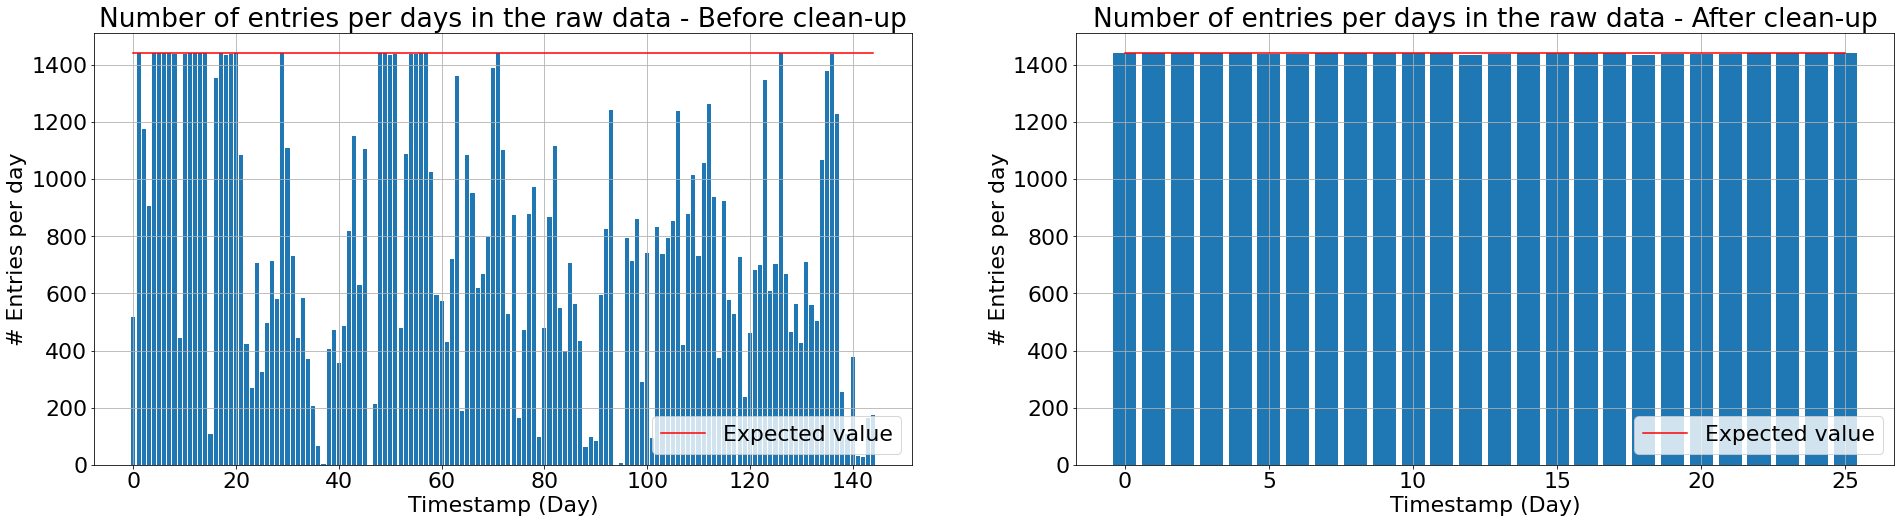

In [16]:
plt.rcParams.update({'font.size': 22})
fig, ((ax1), (ax2)) = plt.subplots(1,2, gridspec_kw=dict(left=0, right=1,
                                        bottom=0, top=1.5), figsize=(25, 4))

ax1.set_title('Number of entries per days in the raw data - Before clean-up')
ax1.plot([1440 for i in range(len(lstcount))], 'r-', label='Expected value')
ax1.bar(range(len(lstcount)), lstcount)
ax1.legend(loc="lower right")
ax1.set_xlabel("Timestamp (Day)")
ax1.set_ylabel("# Entries per day")
ax1.grid()

ax2.set_title('Number of entries per days in the raw data - After clean-up')
ax2.plot([1440 for i in range(len(lstcount2))], 'r-', label='Expected value')
ax2.bar(range(len(lstcount2)), lstcount2)
ax2.legend(loc="lower right")
ax2.set_xlabel("Timestamp (Day)")
ax2.set_ylabel("# Entries per day")
ax2.grid()

In [17]:
newdata.head()

,temperature,power,counter,time
timestamp,,,,
1648076441095,63.8,0.0,95.0,000000
1648076501095,63.8,0.0,96.0,000100
1648076561095,63.8,0.0,97.0,000200
1648076621095,63.8,0.0,98.0,000300
1648076681095,63.3,0.0,99.0,000400


In [18]:
newdata.describe()

,temperature,power,counter
count,38863.000000,38863.000000,38863.000000
mean,65.131508,411.057739,92.791292
std,4.933783,784.724131,79.117134
min,27.800000,0.000000,0.000000
25%,63.000000,0.000000,27.000000
50%,65.800000,0.000000,73.000000
75%,68.500000,0.000000,139.000000
max,71.800000,2034.700000,493.000000


In [19]:
file = '''RPT1106_data_1440.csv'''
newdata.to_csv(file)
# newdata = pd.read_csv(file)

In [20]:
print("Off", len(newdata[newdata.power < 250]))
print("On", len(newdata[newdata.power > 250]))

Off 30489
On 8374


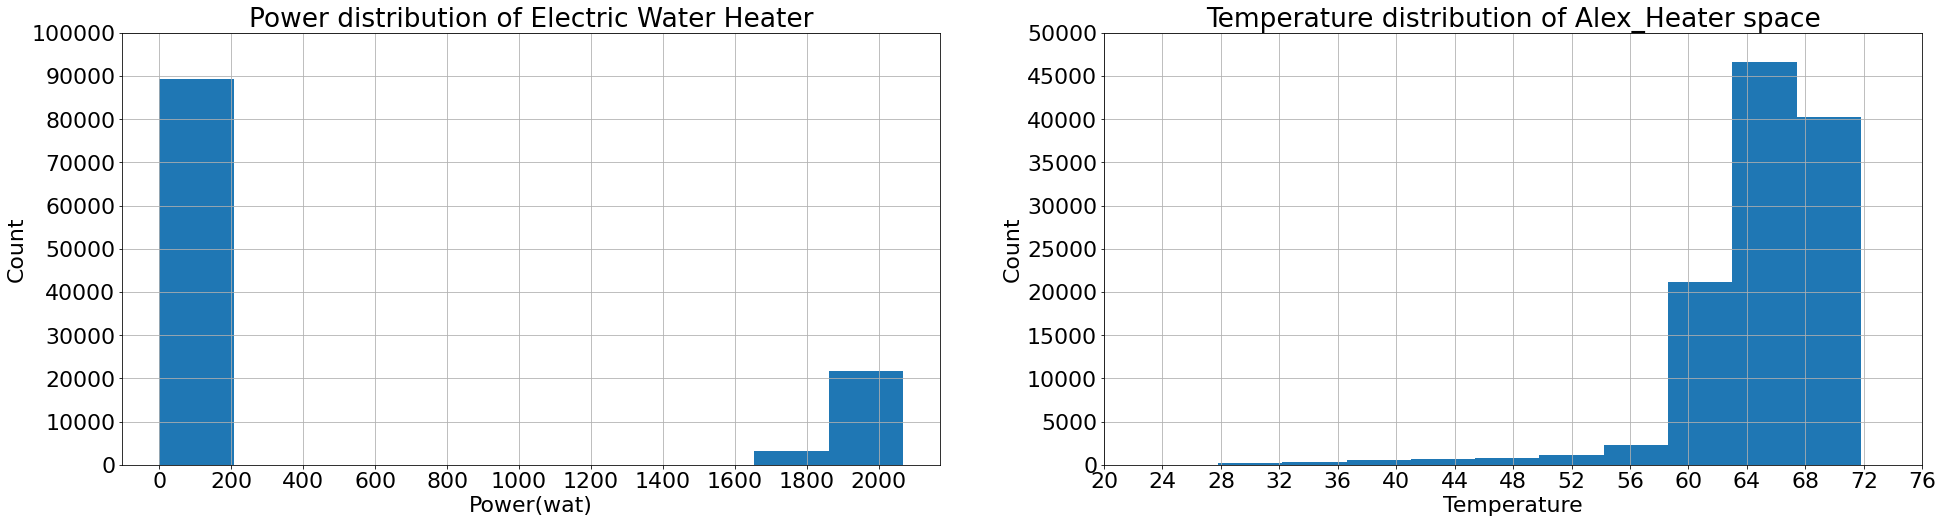

In [21]:
plt.rcParams.update({'font.size': 22})
fig, ((ax1), (ax2)) = plt.subplots(1,2, gridspec_kw=dict(left=0, right=1,
                                        bottom=0, top=1.5), figsize=(25, 4))

ax1.hist(data.power)
ax1.set_xticks(np.arange(0, 2001, 200))
ax1.set_yticks(np.arange(0, 100001, 10000))
ax1.set_title("Power distribution of Electric Water Heater")
ax1.set_xlabel('Power(wat)')
ax1.set_ylabel('Count')
ax1.grid()


ax2.hist(data.temperature)
ax2.set_xticks(np.arange(20, 80, 4))
ax2.set_yticks(np.arange(0, 50001, 5000))
ax2.set_title("Temperature distribution of Alex_Heater space")
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Count')
ax2.grid()

plt.show()

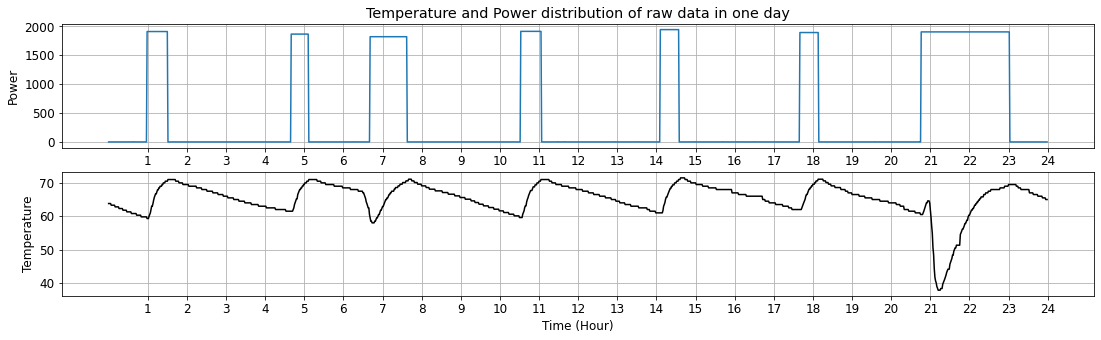

In [22]:
plt.rcParams["figure.figsize"] = (18.5, 5)
plt.rcParams.update({'font.size': 12})
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title("Temperature and Power distribution of raw data in one day")

x = [i/60 for i in range(1440)]

ax1.plot(x, newdata.power[0:1440], '-', label='Power')
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_ylabel('Power')
ax1.grid()

ax2.plot(x, newdata.temperature[0:1440], 'k-', label='Temperature')
ax2.set_xticks(np.arange(1, 25, 1))
ax2.set_xlabel('Time (Hour)')
ax2.set_ylabel('Temperature')
ax2.grid()

plt.show()

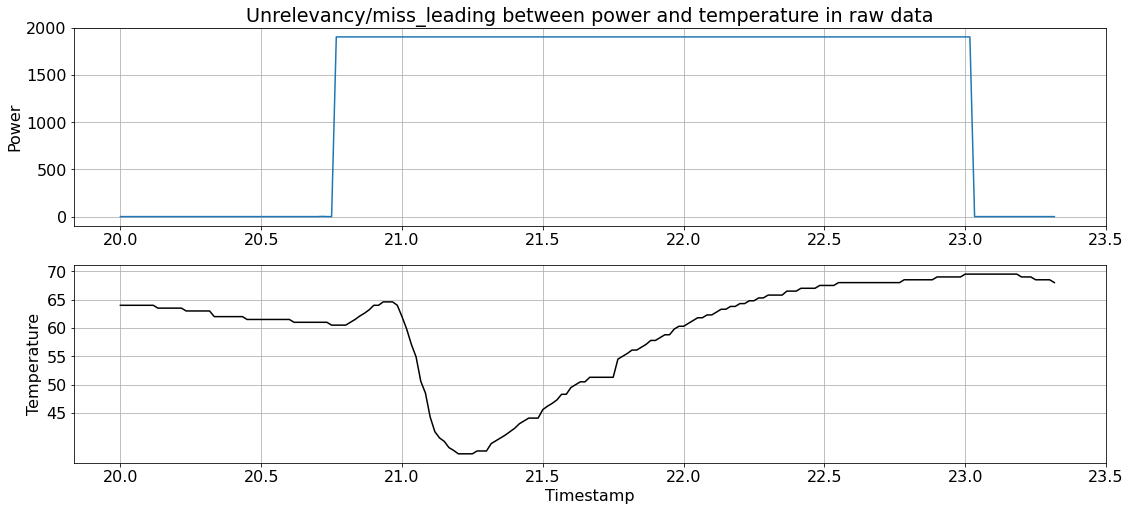

In [23]:
plt.rcParams["figure.figsize"] = (18.5, 8)
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title("Unrelevancy/miss_leading between power and temperature in raw data")

x = [i/60 for i in range(1440)]

ax1.plot(x[1200:1400], newdata.power[1200:1400], '-', label='Power')
ax1.set_xticks(np.arange(20, 24, 0.5))
ax1.set_yticks(np.arange(0, 2001, 500))
ax1.set_ylabel('Power')
ax1.grid()

ax2.plot(x[1200:1400], newdata.temperature[1200:1400], 'k-', label='Temperature')
ax2.set_xticks(np.arange(20, 24, 0.5))
ax2.set_yticks(np.arange(45, 71, 5))
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Temperature')
ax2.grid()

plt.show()

## Daily Power Price

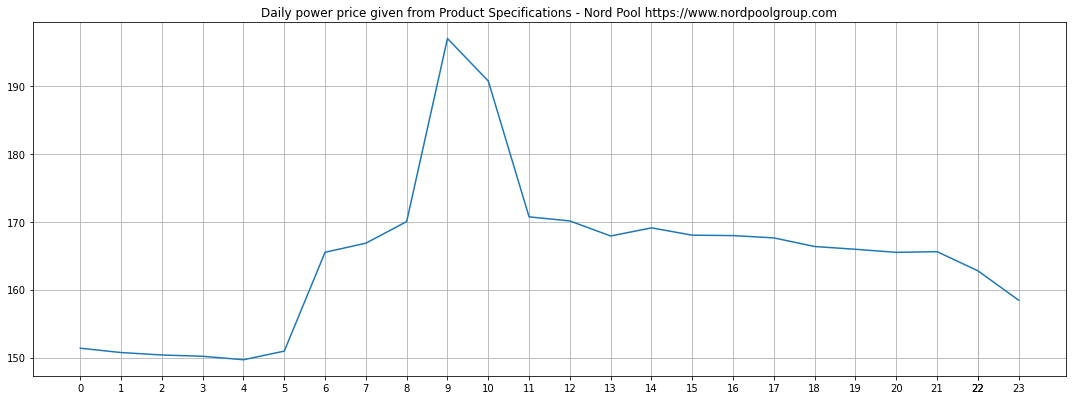

In [4]:
# Import library for fetching Elspot data
from nordpool import elspot, elbas
from pprint import pprint

# Initialize class for fetching Elspot prices
prices_spot = elspot.Prices()
# Initialize class for fetching Elsbas prices
prices_bas = elbas.Prices()

data = prices_spot.hourly(areas=['Oslo'])
data = data['areas']['Oslo']['values']
time = [int(str(datetime.strptime(str(item['start']),'%Y-%m-%d %H:%M:%S+00:00').time())[:2]) for item in data]
price = [item['value'] for item in data]
x = [(22+x)%24 for x in range(0, 25)]

plt.rcParams["figure.figsize"] = (18.5, 6.5)
plt.title("Daily power price given from Product Specifications - Nord Pool https://www.nordpoolgroup.com")
plt.rcParams.update({'font.size': 12})
plt.plot(price)
plt.xticks(x)
plt.grid()

df = pd.DataFrame()
df['time'] = time
df['price'] = price
df.to_csv('daily_power_price.csv')